In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import os, sys
from glob import glob

In [4]:
import psutil
import os
import time
import sys
import math
from contextlib import contextmanager

@contextmanager
def trace(title):
    t0 = time.time()
    p = psutil.Process(os.getpid())
    m0 = p.memory_info()[0] / 2. ** 30
    yield
    m1 = p.memory_info()[0] / 2. ** 30
    delta = m1 - m0
    sign = '+' if delta >= 0 else '-'
    delta = math.fabs(delta)
    print(f"[{m1:.1f}GB({sign}{delta:.1f}GB):{time.time() - t0:.1f}sec] {title} ", file=sys.stderr)

In [5]:
with trace('load data'):
    df_train = pd.read_csv('../data/train_batch1.csv', index_col=0)
#     df_test = pd.read_csv('../data/test_batch1.csv', index_col=0)

[3.0GB(+2.9GB):36.9sec] load data 


In [6]:
with trace('load tsne'):
    df_tsne = pd.read_csv('../data/df_train_tsne_emb_batch1.csv')

[3.0GB(+0.0GB):0.0sec] load tsne 


In [11]:
df_tsne.columns = ['cell', 'emb1', 'emb2']

In [12]:
df_tsne

,cell,emb1,emb2
0,GCCTGTCAACTA,-8.913486,-43.391090
1,AACGCTGTTTGT,-16.639290,-54.373060
2,ACTCAGGGTATT,-9.606029,35.407967
3,GGCAGATCGGCN,41.305473,-14.796123
4,TAACGTAGTTCT,-39.463863,-9.133641
...,...,...,...
5239,GGACTGCCTCCA,19.915810,57.330930
5240,CCTTGTCAGACC,9.842052,-5.290446
5241,ATCTGGCCGCGA,30.312613,47.774853
5242,GTGTCCCCTCCA,-32.621502,33.256306


In [7]:
df_train.head(2)

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,Zfy1,Znrf4,n-R5s164,n-R5s167,n-R5s197,n-R5s207,n-R5s48,n-R5s56,n-R5s86,n-R5s93
GCCTGTCAACTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AACGCTGTTTGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_tsne.head(2)

,gene,emb1,emb2
0,GCCTGTCAACTA,-8.913486,-43.39109
1,AACGCTGTTTGT,-16.639290,-54.37306


In [13]:
def plot_scatter(emb1, emb2):
    plt.figure()
    plt.scatter(emb1, emb2)
    plt.show()

In [14]:
emb1 = df_tsne["emb1"]
emb2 = df_tsne["emb2"]

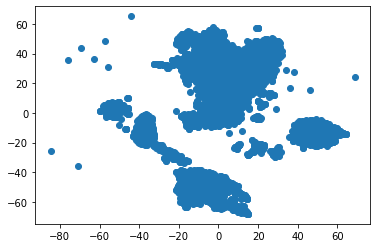

In [16]:
plot_scatter(emb1, emb2)

In [25]:
df_roi = df_tsne[
    (df_tsne.emb1 >= 40) &
    (df_tsne.emb2 <= 0) &
    (-20 <= df_tsne.emb2)
]

In [27]:
cell_roi = df_roi["cell"]

In [32]:
cell_roi

3       GGCAGATCGGCN
12      TTAGTATTACCG
17      GCTGTTAAGAGT
20      GGCATCAACCAA
22      GCTACTTTTTTN
            ...     
5200    CTGACTTCATCC
5201    CCGTTCATCTGT
5227    GATCCTCCCTCA
5228    TCAGTATGCTTG
5237    CGATACGTTATT
Name: cell, Length: 500, dtype: object

In [39]:
df_train_roi = df_train[df_train.index.isin(cell_roi)]
df_train_roi

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,Zfy1,Znrf4,n-R5s164,n-R5s167,n-R5s197,n-R5s207,n-R5s48,n-R5s56,n-R5s86,n-R5s93
GGCAGATCGGCN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTAGTATTACCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCTGTTAAGAGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGCATCAACCAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCTACTTTTTTN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTGACTTCATCC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCGTTCATCTGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GATCCTCCCTCA,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCAGTATGCTTG,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_train_roi.mean(axis=0).sort_values(ascending=False)[:10]

Dbi         50.700
Malat1      35.888
ct          28.400
Apoe        19.788
Nnat        16.496
Hsp90aa1    13.826
Hsp90ab1    12.652
Calm1       11.392
Rarres2     11.066
Fth1        10.646
dtype: float64

In [48]:
neuron_list = ["Agt", "Itm2a", "Tmem212", "Hexb", "Celf4"]

In [53]:
df_train_roi.loc[:, df_train_roi.columns.isin(neuron_list)].mean(axis=0)

Agt        0.104
Celf4      0.344
Hexb       0.086
Itm2a      0.092
Tmem212    5.930
dtype: float64

In [ ]:
df_tsne.to_csv('../data/df_train_tsne_emb_batch1.csv', index=False)
df_tsne.head()